In [78]:
#!/usr/local/bin/python
# -*- coding: utf-8 -*-

import sys, os, string, time
from subprocess import Popen, PIPE, STDOUT

fullpath = os.path.dirname(os.path.realpath(sys.argv[0]))
fullpath += '/tests/'
fullpath = unicode(fullpath,'utf-8')

list_dir = os.listdir(fullpath)
inputs = [x for x in list_dir if x.startswith('i')]
inputs = sorted(inputs)

batch_size = 10

inp = 'i_000.txt'
times1 = []
times2 = []
with open('tests/' + inp,'r') as f_i:
    no_num = f_i.read()
    for num_threads in xrange(1,15):
        tmp_time1 = []
        tmp_time2 = []
        for i in range(batch_size):
            p = Popen(['./a.out'], shell=True, stdout=PIPE, stdin=PIPE, stderr=STDOUT)
            input_values = '{}\n'.format(num_threads) + no_num
            prog_out = p.communicate(input_values)[0].split()
#             print prog_out
            if int(prog_out[0]) > 0:
                tmp_time1.append(int(prog_out[0]))
            if int(prog_out[1]) > 0:
                tmp_time2.append(int(prog_out[1]))
        times1.append(sum(tmp_time1) * 1.0 / len(tmp_time1))
        times2.append(sum(tmp_time2) * 1.0 / len(tmp_time2))
print times1
print '-'
print times2

[146555.875, 125968.33333333333, 134347.125, 126324.22222222222, 125820.125, 126382.7, 125854.7, 126182.1, 126058.1, 125504.2, 160204.11111111112, 141454.5, 126824.875, 167247.6]
-
[7242.8, 5387.9, 5609.0, 5722.9, 13782.3, 60269.125, 117738.875, 113836.71428571429, 117434.125, 106867.85714285714, 122314.125, 128895.77777777778, 126406.11111111111, 223739.33333333334]


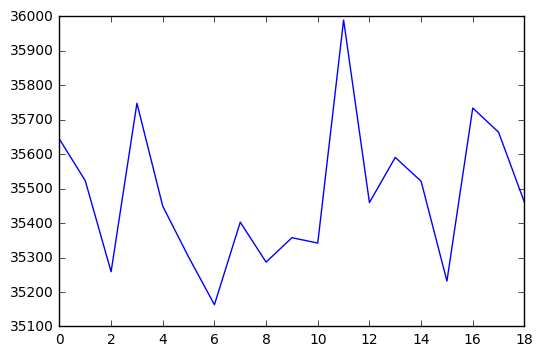

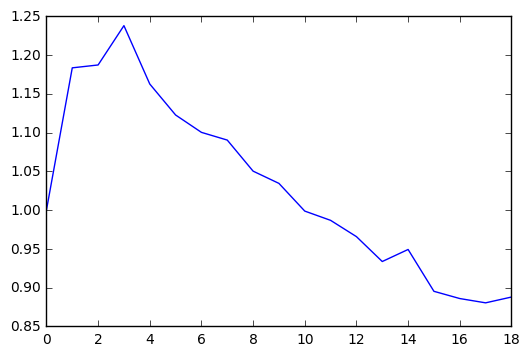

In [84]:
times1 = [35643.7, 35523.1, 35258.88888888889, 35748.0, 35449.0, 35301.7, 35163.11111111111, 35402.7, 35286.77777777778, 35357.6, 35342.1, 35989.6, 35459.7, 35590.666666666664, 35521.6, 35231.77777777778, 35734.2, 35663.77777777778, 35460.4]
times2 = [2772.3, 2342.1, 2334.8, 2239.1, 2384.1, 2469.0, 2519.3, 2542.3, 2639.3, 2679.6, 2775.5, 2809.1111111111113, 2870.2, 2968.9, 2920.3, 3096.4, 3129.0, 3148.7, 3122.2]

plt.figure()
plt.plot(times1)
plt.show()

plt.figure()
plt.plot(times2[0] * 1.0 / np.array(times2))
plt.show()

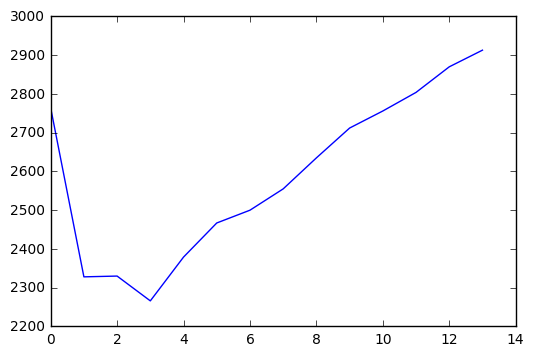

In [65]:
times = [2764, 2328, 2330, 2266, 2379, 2467, 2500, 2555, 2635, 2712, 2756, 2804, 2870, 2913]
plt.figure()
plt.plot(times)
plt.show()

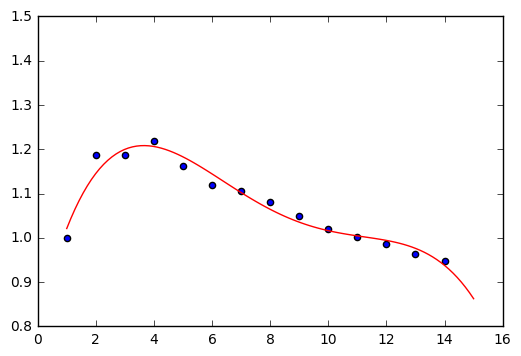

In [71]:
x = np.arange(1,len(times)+1)
y = times[0] * 1.0 / np.array(times)

plt.figure()
plt.scatter(x, y)
z = np.polyfit(x, y, 4)
p = np.poly1d(z)
x = np.linspace(1,15,100)
plt.plot(x,p(x),"r")
# plt.xlim((1,15))
plt.ylim((0.8,1.5))
plt.show()